In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [23]:
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

def set_font(font_file='malgun.ttf'): # 한글 출력
    font_dir = 'c:/Windows/Fonts/'
    font_name = fm.FontProperties(fname=os.path.join(font_dir, font_file)).get_name()
    rc('font', family=font_name)
set_font()

In [3]:
data=pd.read_excel('C:\\roundabout\\roundabout_project\\data\\모든교차로.xlsx')

In [4]:
data.head()

,교차로명,교차로 반경 50m 내 무인교통단속카메라 수,교차로 반경 50m 내 신호등 유무,읍면동평균속도,읍면동첨두시평행속도,읍면동승용차교통량,읍면동버스교통량,읍면동트럭교통량,교차로유형,스쿨존여부,회전교차로여부,사고건수,위도,경도
0,가덕지구대3,0,0,58.72,49.65,1587,36,419,3지,0,0,0,36.561536,127.541219
1,가마육교4,0,0,29.60,19.05,9683,110,1618,4지,0,0,4,36.596090,127.471779
2,강내월곡4,0,0,56.98,48.99,2610,113,1179,4지,0,0,6,36.624493,127.369452
3,강내탑연3,0,0,56.98,48.99,2610,113,1179,3지,0,0,4,36.623910,127.358570
4,강외서평3,0,0,35.29,15.31,14712,222,3193,3지,0,0,2,36.605214,127.309905


In [5]:
data.columns

Index(['교차로명', '교차로 반경 50m 내 무인교통단속카메라 수', '교차로 반경 50m 내 신호등 유무', '읍면동평균속도',
       '읍면동첨두시평행속도', '읍면동승용차교통량', '읍면동버스교통량', '읍면동트럭교통량', '교차로유형', '스쿨존여부',
       '회전교차로여부', '사고건수', '위도', '경도'],
      dtype='object')

In [6]:
data.columns = ['load','cctv', 'sign', 'speed',
       'peek_speed', 'car', 'bus', 'truck', 'type', 'school',
       'roundabout', 'accident', '위도', '경도']

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
model = data.drop(['위도','경도'],axis=1)

In [9]:
model.tail(10)

,load,cctv,sign,speed,peek_speed,car,bus,truck,type,school,roundabout,accident
70,오송서평회전교차로,0,0,35.29,15.31,14712,222,3193,5지,0,1,1
71,금천회전교차로,0,0,30.34,20.74,11048,129,1951,5지,0,1,32
72,문의파출소앞회전교차로,0,0,68.43,48.77,16520,641,6404,4지,0,1,0
73,내덕회전교차로,0,0,38.63,18.98,6110,87,1130,4지,0,1,4
74,석곡회전교차로,0,0,58.22,45.52,13088,470,4643,4지,0,1,19
75,북이회전교차로,0,0,35.49,15.67,10146,142,2067,4지,0,1,0
76,상당산성회전교차로,0,0,61.59,27.01,13487,373,4467,4지,0,1,1
77,가덕상야한계회전교차로,0,0,58.72,49.65,1587,36,419,3지,0,1,0
78,남이팔봉삼거리회전교차로,0,0,29.60,19.05,9683,110,1618,3지,0,1,0
79,오송쌍청교삼거리회전교차로,0,0,35.29,15.31,14712,222,3193,3지,0,1,2


In [10]:
model.drop(index=[71,74],axis=0,inplace=True)

In [11]:
train = pd.get_dummies(model.drop('load',axis=1))

In [12]:
train.head()

,cctv,sign,speed,peek_speed,car,bus,truck,school,roundabout,accident,type_3지,type_4지,type_5지,type_6지
0,0,0,58.72,49.65,1587,36,419,0,0,0,1,0,0,0
1,0,0,29.60,19.05,9683,110,1618,0,0,4,0,1,0,0
2,0,0,56.98,48.99,2610,113,1179,0,0,6,0,1,0,0
3,0,0,56.98,48.99,2610,113,1179,0,0,4,1,0,0,0
4,0,0,35.29,15.31,14712,222,3193,0,0,2,1,0,0,0


In [13]:
test = pd.read_excel('C:\\roundabout\\roundabout_project\\data\\test.xlsx')

In [14]:
test=test.set_index('교차로명')

In [15]:
test = pd.get_dummies(test)

In [16]:
train_x = train.drop('accident',axis=1)
train_y = train['accident']


In [17]:
rf= RandomForestRegressor()
rf.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [18]:
pred= rf.predict(test)

In [19]:
test['accident'] = np.ceil(pred)

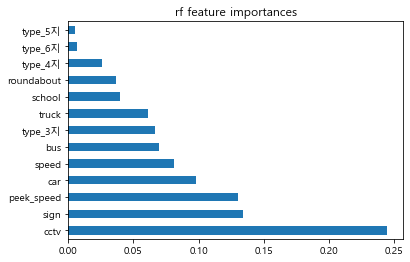

In [25]:
feat_importance=pd.Series(rf.feature_importances_,index=train_x.columns)
feat_importance.nlargest(100).plot(kind='barh')
plt.title('rf feature importances')
plt.show()